In [1]:
import numpy as np
from src.embedding_manager import EmbeddingManager

In [2]:
em = EmbeddingManager(path='../fasttext.wiki-news-300d-1M.vec')

100%|██████████| 999995/999995 [01:24<00:00, 11809.90it/s]


Total embeddings shape: (629762, 300)


In [3]:
power = em.get_vector('power')
authority = em.get_vector('authority')
government = em.get_vector('government')
man = em.get_vector('man')

avg_vector = np.mean([power, authority, government, man], axis=0)
em.get_words(avg_vector, 10)

Estimator is being prepared...


[('authority', 1.0289617947526117),
 ('power', 1.1381789353724092),
 ('government', 1.1628852017446072),
 ('governmental', 1.1726115075890766),
 ('man', 1.1744869205508266),
 ('ruler', 1.2175793611453776),
 ('statesman', 1.21860621679381),
 ('woman', 1.2313762892635538),
 ('dominion', 1.2320704318769573),
 ('machinery', 1.2456221388303736)]

Good enough. Embeddings do not show that kind of insight as they show in typical embeddings tutorial, but it is as expected.

There is an option to reduce dimensionality either by taking other embeddings or through PCA, and this might get a little more robust results.

# Simple analysis

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
def plot_distribution(array, title, plot=True):
    print(title.capitalize())
    print()
    print(f'Mean {title}: {np.mean(array)}')
    print(f'Median {title}: {np.median(array)}')
    print(f'Max {title}: {np.max(array)}')
    print(f'Min {title}: {np.min(array)}')
    
    if plot:
        _ = plt.hist(array, bins=100)
        plt.show()
        print()
    print()

In [69]:
def print_simple_analysis(vectors, plot=True):
    print('mean:', np.mean(vectors))
    print('median:', np.median(vectors))
    print('max:', np.max(vectors))
    print('min:', np.min(vectors))

    mean_values = np.mean(vectors, axis=1)
    median_values = np.median(vectors, axis=1)
    max_values = np.max(vectors, axis=1)
    min_values = np.min(vectors, axis=1)
    
    plot_distribution(mean_values, 'mean values across entries', plot)
    plot_distribution(median_values, 'median values across entries', plot)
    plot_distribution(max_values, 'max values across entries', plot)
    plot_distribution(min_values, 'min values across entries', plot)
    
    mean_values_per_dim = np.mean(vectors, axis=0)
    median_values_per_dim = np.median(vectors, axis=0)
    max_values_per_dim = np.max(vectors, axis=0)
    min_values_per_dim = np.min(vectors, axis=0)
    
    plot_distribution(mean_values_per_dim, 'mean values across dimensions', plot)
    plot_distribution(median_values_per_dim, 'median values across dimensions', plot)
    plot_distribution(max_values_per_dim, 'max values across dimensions', plot)
    plot_distribution(min_values_per_dim, 'min values across dimensions', plot)

mean: -0.0031533798
median: 1e-04
max: 7.4302
min: -57.307
Mean values across entries

Mean mean values across entries: -0.003153381636366248
Median mean values across entries: -0.003001083619892597
Max mean values across entries: 0.02512366697192192
Min mean values across entries: -0.22580499947071075


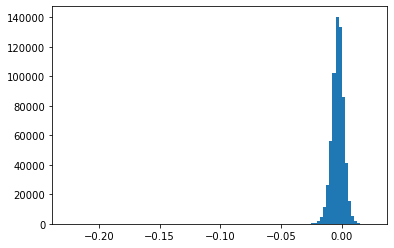



Median values across entries

Mean median values across entries: 8.126781722239684e-06
Median median values across entries: 0.00010000000474974513
Max median values across entries: 0.04960000142455101
Min median values across entries: -0.060999996960163116


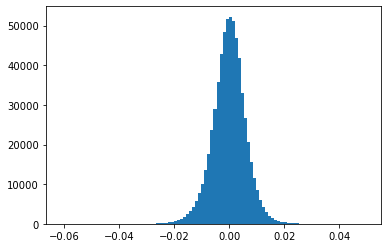



Max values across entries

Mean max values across entries: 0.30751845240592957
Median max values across entries: 0.2913999855518341
Max max values across entries: 7.430200099945068
Min max values across entries: 0.05389999970793724


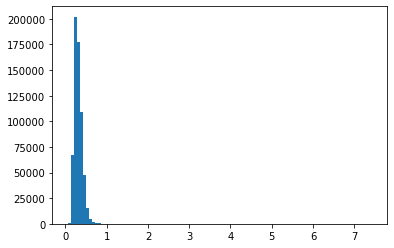



Min values across entries

Mean min values across entries: -0.8396312594413757
Median min values across entries: -0.8338000178337097
Max min values across entries: -0.4749000072479248
Min min values across entries: -57.30699920654297


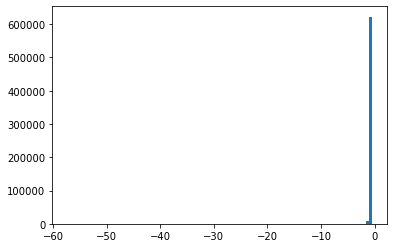



Mean values across dimensions

Mean mean values across dimensions: -0.003153401892632246
Median mean values across dimensions: 0.0006508835358545184
Max mean values across dimensions: 0.07590746134519577
Min mean values across dimensions: -0.8359929919242859


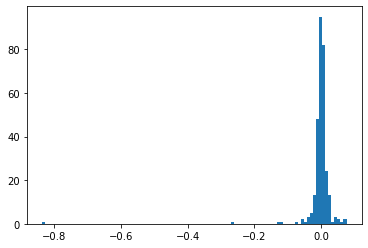



Median values across dimensions

Mean median values across dimensions: -0.0033461253624409437
Median median values across dimensions: 0.0005999999702908099
Max median values across dimensions: 0.06719999760389328
Min median values across dimensions: -0.8335000276565552


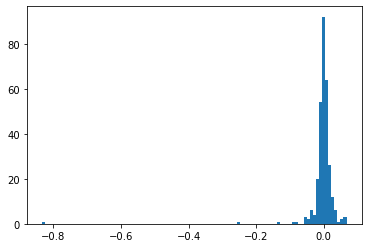



Max values across dimensions

Mean max values across dimensions: 1.0163142681121826
Median max values across dimensions: 0.8324500322341919
Max max values across dimensions: 7.430200099945068
Min max values across dimensions: -0.1266999989748001


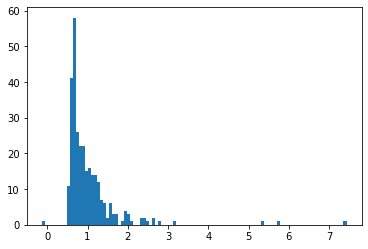



Min values across dimensions

Mean min values across dimensions: -1.2787516117095947
Median min values across dimensions: -0.7749999761581421
Max min values across dimensions: -0.5239999890327454
Min min values across dimensions: -57.30699920654297


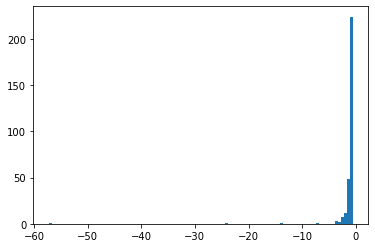

In [70]:
print_simple_analysis(em.vectors)

### Clearly there are outliers both in entries and dimensions.

Next step is to find the exact amount and try to filter them out.

In [16]:
def filter_values(array, limits, title):
    filtered_out_idx =  (array < limits[0]) | (array > limits[1])
    filtered_out = array[filtered_out_idx]
    print(f'Filtered out by {title} in {limits}: {filtered_out.shape[0]}')
    return filtered_out_idx

In [17]:
# Per entry limits
mean_limits = (-0.03, 0.03)
median_limits = (-0.04, 0.04)
max_limits = (0, 1)
min_limits = (-1, 0)

In [18]:
mean_filtered_out_idx = filter_values(mean_values, mean_limits, 'mean')
median_filtered_out_idx = filter_values(median_values, median_limits, 'median')
max_filtered_out_idx = filter_values(max_values, max_limits, 'max')
min_filtered_out_idx = filter_values(min_values, min_limits, 'min')

total_entry_filter_idx = mean_filtered_out_idx | median_filtered_out_idx | max_filtered_out_idx | min_filtered_out_idx
print(f'Total filtered out entries count: {em.vectors[total_entry_filter_idx].shape[0]}')

Filtered out by mean in (-0.03, 0.03): 118
Filtered out by median in (-0.04, 0.04): 4
Filtered out by max in (0, 1): 530
Filtered out by min in (-1, 0): 18219
Total filtered out entries count: 18619


In [19]:
# Per dimension limits
mean_dim_limits = (-0.1, 0.1)
median_dim_limits = (-0.1, 0.1)
max_dim_limits = (0, 2)
min_dim_limits = (-2, 0)

mean_dim_filtered_out_idx = filter_values(mean_values_per_dim, mean_dim_limits, 'mean per dimension')
median_dim_filtered_out_idx = filter_values(median_values_per_dim, median_dim_limits, 'median per dimension')
max_dim_filtered_out_idx = filter_values(max_values_per_dim, max_dim_limits, 'max per dimension')
min_dim_filtered_out_idx = filter_values(min_values_per_dim, min_dim_limits, 'min per dimension')

total_dimension_filter_idx = mean_dim_filtered_out_idx | median_dim_filtered_out_idx | max_dim_filtered_out_idx | min_dim_filtered_out_idx
print(f'Total filtered out dimensions count: {em.vectors[0][total_dimension_filter_idx].shape[0]}')

Filtered out by mean per dimension in (-0.1, 0.1): 4
Filtered out by median per dimension in (-0.1, 0.1): 3
Filtered out by max per dimension in (0, 2): 17
Filtered out by min per dimension in (-2, 0): 21
Total filtered out dimensions count: 35


#### Intermediate summary
Of course, losing 19k entries from 630k dictionary, which is ~3% of all entries is far less damaging than losing 35 dimensions from 300 dimensioned embedding, which is ~12% of all dimensions.

The safest strategy is to filter out entries, check if the remaining words are enough to cover a generic text, and then repeat analysis of dimension outliers, and clean them if necessary.

##### Load test texts

In [20]:
import pandas as pd
from tqdm import tqdm
from src.text_preprocessor import TextPreprocessor

tqdm.pandas()

reviews_df = pd.read_csv('../amazon-food-reviews.csv')
reviews_df.columns = [col_name.lower() for col_name in reviews_df.columns]
reviews_df = reviews_df[['text', 'summary']]
reviews_df = reviews_df.drop_duplicates(subset=['text'])
reviews_df = reviews_df.dropna()

text_preprocessor = TextPreprocessor(gentle=True)
reviews_df['text'] = reviews_df['text'].progress_apply(text_preprocessor.process)
reviews_df['summary'] = reviews_df['summary'].progress_apply(text_preprocessor.process)

text_corpus = ' '.join(reviews_df['text'].to_list() + reviews_df['summary'].to_list())

100%|██████████| 393576/393576 [00:02<00:00, 171191.29it/s]


In [21]:
from collections import Counter

word_counter = Counter()
for word in tqdm(text_corpus.split()):
    word_counter[word] += 1

100%|██████████| 33832951/33832951 [00:21<00:00, 1541598.04it/s]


In [34]:
def get_missing_words(words):
    missing_words = []
    words_set = set(words)
    for word in tqdm(word_counter):
        if word not in words_set:
            row = {'word': word, 'count': word_counter[word]}
            missing_words.append(row)
            
    df = pd.DataFrame(missing_words)
    df = df.sort_values(by=['count'], ascending=False)
    df.reset_index(inplace=True, drop=True)
    return df

In [42]:
missing_words = get_missing_words(em.words)
print(missing_words.describe())
print(missing_words['word'].to_list()[:300])

100%|██████████| 116845/116845 [00:00<00:00, 581597.88it/s]


              count
count  44756.000000
mean       2.652538
std       12.421650
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max      971.000000
['nutiva', 'kcups', 'eacute', 'issimo', 'nylabone', 'kcup', 'orijen', 'influenster', 'tinkyada', 'weruva', 'rawhides', 'sunbutter', 'yuban', 'aerogarden', 'appletini', 'orgain', 'teeccino', 'dreamfields', 'dogswell', 'larabar', 'larabars', 'nylabones', 'puroast', 'glutino', 'brezza', 'nectresse', 'krusteaz', 'egrave', 'avoderm', 'golean', 'kuerig', 'cytomax', 'beaba', 'yummm', 'decafs', 'souchong', 'ntilde', 'luzianne', 'zukes', 'puerh', 'snackwell', 'totw', 'vitacoco', 'sojos', 'gopicnic', 'chebe', 'yummmm', 'megafudge', 'ramyun', 'autoship', 'voxbox', 'stevita', 'happybaby', 'thinkthin', 'dalfour', 'flossies', 'volumizing', 'hazlenut', 'hextra', 'jerkey', 'compleats', 'ekobrew', 'eboost', 'vinturi', 'gentlease', 'honeybush', 'jalape', 'yummyearth', 'proteinate', 'decaffinated', 'cafix', 'babycook', 'genmaic

#### In current, unfiltered state, text corpus contains 44756 unrepresented in embedding dictionary words.
Most of those words are names and trademarks, some typos and colloquial words.

##### Check on filtered embeddings

In [43]:
filtered_words = em.words[~total_entry_filter_idx]
filtered_words.shape[0]

611143

In [44]:
missing_words_filtered = get_missing_words(filtered_words)
print(missing_words_filtered.describe())
print(missing_words_filtered['word'].to_list()[:300])

100%|██████████| 116845/116845 [00:00<00:00, 596071.52it/s]


             count
count  45636.00000
mean       3.55351
std       44.19676
min        1.00000
25%        1.00000
50%        1.00000
75%        2.00000
max     5000.00000
['licorice', 'healthier', 'allergic', 'fructose', 'disgusting', 'digestive', 'celiac', 'dietary', 'resealable', 'omg', 'hydrogenated', 'nutiva', 'tastier', 'glycemic', 'lazy', 'kcups', 'healthiest', 'eacute', 'related', 'refrigerate', 'medicinal', 'rinsed', 'issimo', 'nylabone', 'kcup', 'orijen', 'unnecessary', 'recomend', 'influenster', 'nutrient', 'pickled', 'tinkyada', 'deliciousness', 'urinary', 'weruva', 'rawhides', 'creamier', 'sunbutter', 'yuban', 'pureed', 'aerogarden', 'appletini', 'orgain', 'teeccino', 'rica', 'dreamfields', 'dogswell', 'larabar', 'ascorbic', 'opinions', 'larabars', 'fails', 'nylabones', 'benecol', 'gastric', 'puroast', 'sinus', 'glutino', 'marinate', 'folic', 'brezza', 'nectresse', 'krusteaz', 'egrave', 'avoderm', 'golean', 'kuerig', 'cytomax', 'unappetizing', 'beaba', 'yummm', 'kisses', 'o

In [49]:
difference_df = pd.concat([missing_words, missing_words_filtered]).drop_duplicates(keep=False)
print(difference_df.describe())
print(difference_df['word'].to_list()[:880])

             count
count   880.000000
mean     49.376136
std     302.345090
min       1.000000
25%       1.000000
50%       2.000000
75%       7.000000
max    5000.000000
['licorice', 'healthier', 'allergic', 'fructose', 'disgusting', 'digestive', 'celiac', 'dietary', 'resealable', 'omg', 'hydrogenated', 'tastier', 'glycemic', 'lazy', 'healthiest', 'related', 'refrigerate', 'medicinal', 'rinsed', 'unnecessary', 'recomend', 'nutrient', 'pickled', 'deliciousness', 'urinary', 'creamier', 'pureed', 'rica', 'ascorbic', 'opinions', 'fails', 'benecol', 'gastric', 'sinus', 'marinate', 'folic', 'unappetizing', 'kisses', 'overcook', 'thyroid', 'hansen', 'washes', 'renal', 'thiamine', 'gastrointestinal', 'monounsaturated', 'discolored', 'skimp', 'moisturize', 'haired', 'enzymatic', 'moister', 'resembled', 'wagging', 'abdominal', 'odorless', 'respiratory', 'lactic', 'antibacterial', 'metabolic', 'customize', 'overeat', 'preheat', 'enables', 'collard', 'juicer', 'unsaturated', 'uneaten', 'aback', '

#### Now there is 880 more missing words
Some of them looks important

mean: -0.003092394
median: 1e-04
max: 0.9996
min: -1.0
Mean values across entries

Mean mean values across entries: -0.00309239374473691
Median mean values across entries: -0.0029679997824132442
Max mean values across entries: 0.02512366697192192
Min mean values across entries: -0.02993199974298477


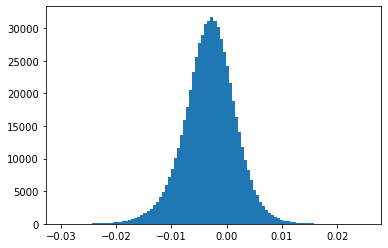



Median values across entries

Mean median values across entries: 3.3935357350856066e-05
Median median values across entries: 0.000100000761449337
Max median values across entries: 0.03564999997615814
Min median values across entries: -0.03984999656677246


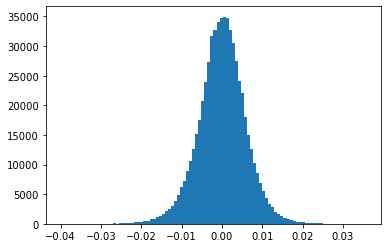



Max values across entries

Mean max values across entries: 0.3030838966369629
Median max values across entries: 0.28839999437332153
Max max values across entries: 0.9995999932289124
Min max values across entries: 0.05389999970793724


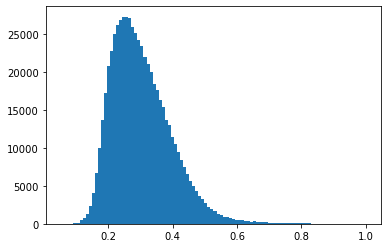



Min values across entries

Mean min values across entries: -0.8300462961196899
Median min values across entries: -0.8307999968528748
Max min values across entries: -0.4749000072479248
Min min values across entries: -1.0


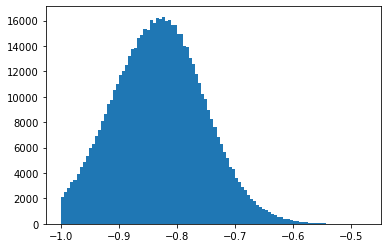



Mean values across dimensions

Mean mean values across dimensions: -0.003092398401349783
Median mean values across dimensions: 0.000656419899314642
Max mean values across dimensions: 0.07522185891866684
Min mean values across dimensions: -0.8299053311347961


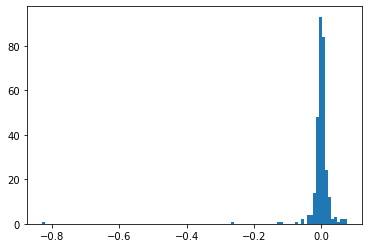



Median values across dimensions

Mean median values across dimensions: -0.003318250412121415
Median median values across dimensions: 0.0006000000284984708
Max median values across dimensions: 0.06650000065565109
Min median values across dimensions: -0.8306999802589417


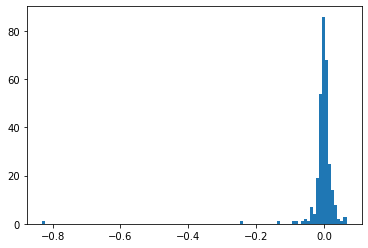



Max values across dimensions

Mean max values across dimensions: 0.6061000823974609
Median max values across dimensions: 0.5993499755859375
Max max values across dimensions: 0.9995999932289124
Min max values across dimensions: -0.4749000072479248


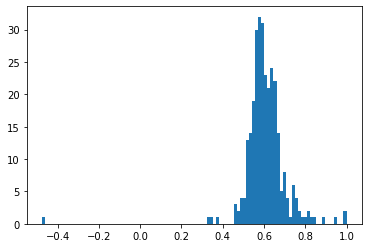



Min values across dimensions

Mean min values across dimensions: -0.6223863959312439
Median min values across dimensions: -0.6089999675750732
Max min values across dimensions: -0.4366999864578247
Min min values across dimensions: -1.0


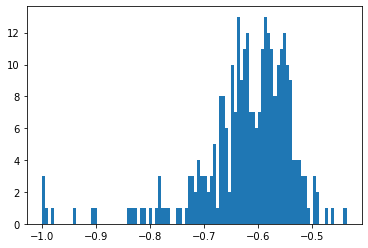

In [71]:
filtered_vectors = em.vectors[~total_entry_filter_idx]
print_simple_analysis(filtered_vectors)

### Try find outliers 

Use IsolationForest to get rid from anomalies

In [57]:
from sklearn.ensemble import IsolationForest

In [58]:
isolation_forest = IsolationForest()
print('Fitting...')
isolation_forest.fit(em.vectors)

print('Predicting...')
outlier_mask = isolation_forest.predict(em.vectors)
outlier_idx = outlier_mask == -1
outlier_words = em.words[outlier_idx]

print(f'Number of anomalies: {outlier_words.shape[0]}')

Fitting...
Predicting...
Number of anomalies: 25403


100%|██████████| 116845/116845 [00:00<00:00, 144418.88it/s]


              count
count   3595.000000
mean      34.081224
std      354.082378
min        1.000000
25%        1.000000
50%        2.000000
75%        6.000000
max    17599.000000
['calories', 'keurig', 'cracker', 'grains', 'raspberry', 'herbal', 'bbq', 'lipton', 'cheddar', 'quinoa', 'ramen', 'digestive', 'sprinkle', 'mints', 'truffle', 'twinings', 'purina', 'creme', 'rinse', 'haribo', 'blender', 'bowls', 'aspartame', 'kosher', 'dietary', 'bigelow', 'digestion', 'terrier', 'teaspoons', 'sprouts', 'canola', 'magnesium', 'tablets', 'gingerbread', 'moths', 'newtons', 'soybean', 'medicinal', 'rinsed', 'nabisco', 'lindt', 'retriever', 'nespresso', 'poultry', 'watering', 'boston', 'headache', 'calming', 'saltiness', 'raved', 'dinners', 'refunded', 'nescafe', 'teapot', 'teething', 'urinary', 'bulbs', 'hormel', 'hydration', 'undrinkable', 'kombucha', 'publix', 'rda', 'tequila', 'arsenic', 'douwe', 'vegetarians', 'acne', 'disapointed', 'tetley', 'vegans', 'detox', 'cleanse', 'sniffed', 'spaniel

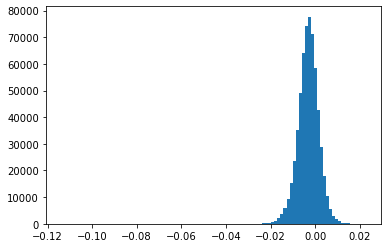



Median values across entries

Mean median values across entries: 5.5313365010078996e-05
Median median values across entries: 0.00014999997802078724
Max median values across entries: 0.03564999997615814
Min median values across entries: -0.042249999940395355


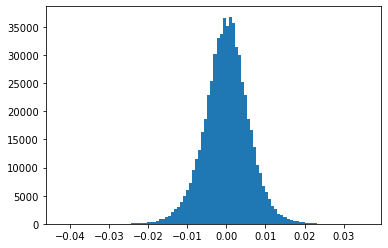



Max values across entries

Mean max values across entries: 0.3015598654747009
Median max values across entries: 0.2865999937057495
Max max values across entries: 4.830399990081787
Min max values across entries: 0.05389999970793724


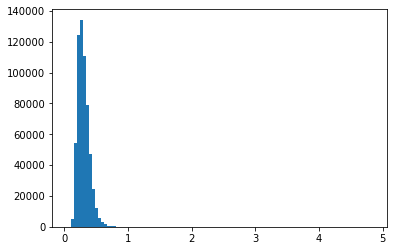



Min values across entries

Mean min values across entries: -0.8336288928985596
Median min values across entries: -0.8306999802589417
Max min values across entries: -0.4749000072479248
Min min values across entries: -27.767900466918945


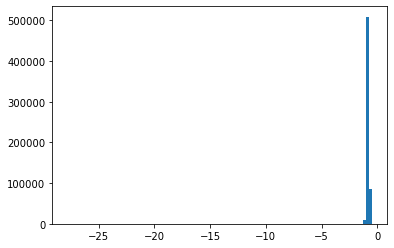



Mean values across dimensions

Mean mean values across dimensions: -0.0030774178449064493
Median mean values across dimensions: 0.0010024383664131165
Max mean values across dimensions: 0.07160474359989166
Min mean values across dimensions: -0.8322367668151855


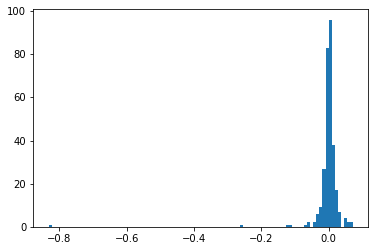



Median values across dimensions

Mean median values across dimensions: -0.003304666606709361
Median median values across dimensions: 0.0003250000881962478
Max median values across dimensions: 0.06700000166893005
Min median values across dimensions: -0.8305000066757202


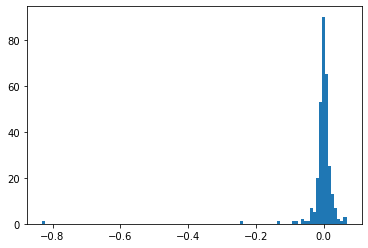



Max values across dimensions

Mean max values across dimensions: 0.6076592206954956
Median max values across dimensions: 0.5709999799728394
Max max values across dimensions: 4.830399990081787
Min max values across dimensions: -0.4749000072479248


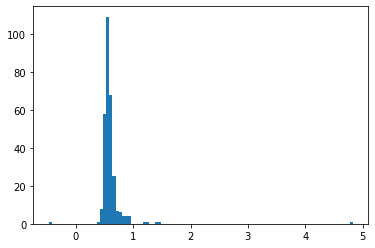



Min values across dimensions

Mean min values across dimensions: -0.6994872093200684
Median min values across dimensions: -0.5689499974250793
Max min values across dimensions: -0.4534500241279602
Min min values across dimensions: -27.767900466918945


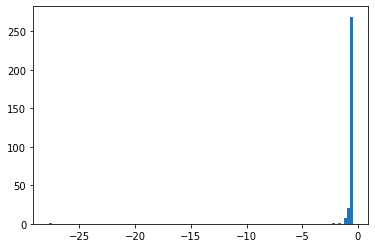

In [72]:
auto_corrected_vectors = em.vectors[~outlier_idx]
auto_corrected_words = em.words[~outlier_idx]

auto_corrected_missing_words = get_missing_words(auto_corrected_words)
auto_corrected_difference_df = pd.concat([missing_words, auto_corrected_missing_words]).drop_duplicates(keep=False)
print(auto_corrected_difference_df.describe())
print(auto_corrected_difference_df['word'].to_list()[:300])

print_simple_analysis(auto_corrected_vectors)

### Embeddings cleaning conclusion

Initial embeddings dictionary contains not very balanced data.

Manual cleaning gets better results - more balanced overall stats for embeddings, lesser loss of important words. But it obviously requires some more attention then automatical outlier detections.

#### One more way of cleaning embeddings - dimensionality reduction.

Comparison between manual approach and PCA.

(629762, 265)
mean: 0.0016996813
median: 0.0014
max: 1.9866
min: -1.9399
Mean values across entries

Mean mean values across entries: 0.001699683372862637
Median mean values across entries: 0.0017075473442673683
Max mean values across entries: 0.04391924664378166
Min mean values across entries: -0.03336074575781822


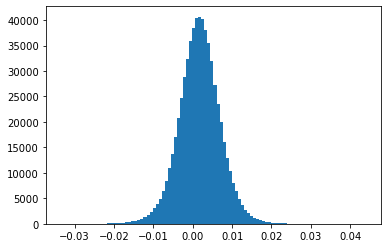



Median values across entries

Mean median values across entries: 0.0014912692131474614
Median median values across entries: 0.0014500003308057785
Max median values across entries: 0.07349999994039536
Min median values across entries: -0.05999999865889549


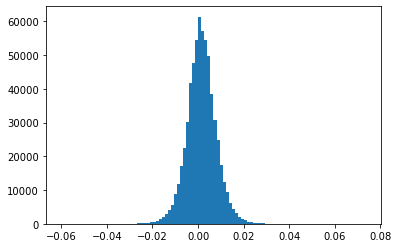



Max values across entries

Mean max values across entries: 0.25927188992500305
Median max values across entries: 0.24504999816417694
Max max values across entries: 1.9866000413894653
Min max values across entries: 0.027899999171495438


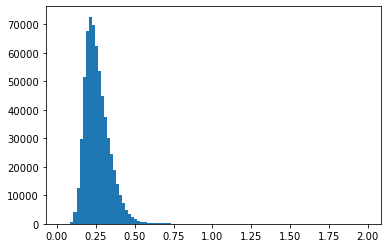



Min values across entries

Mean min values across entries: -0.2561971843242645
Median min values across entries: -0.24169999361038208
Max min values across entries: -0.032600000500679016
Min min values across entries: -1.9399000406265259


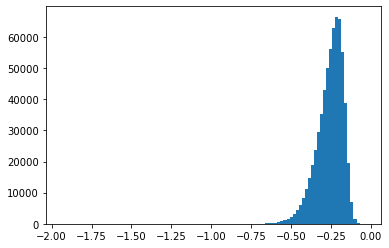



Mean values across dimensions

Mean mean values across dimensions: 0.0016996832564473152
Median mean values across dimensions: 0.0013200967805460095
Max mean values across dimensions: 0.07590612769126892
Min mean values across dimensions: -0.040779341012239456


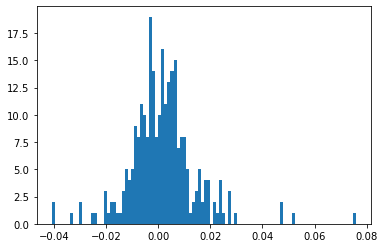



Median values across dimensions

Mean median values across dimensions: 0.0016265565063804388
Median median values across dimensions: 0.0009000003337860107
Max median values across dimensions: 0.06719999760389328
Min median values across dimensions: -0.04149999842047691


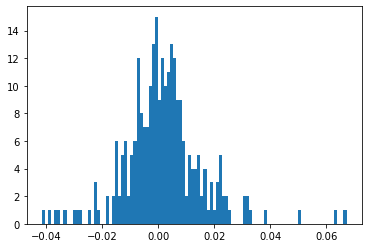



Max values across dimensions

Mean max values across dimensions: 0.8967588543891907
Median max values across dimensions: 0.794700026512146
Max max values across dimensions: 1.9866000413894653
Min max values across dimensions: 0.5214999914169312


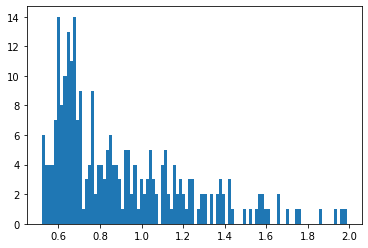



Min values across dimensions

Mean min values across dimensions: -0.8507856726646423
Median min values across dimensions: -0.7390000224113464
Max min values across dimensions: -0.525600016117096
Min min values across dimensions: -1.9399000406265259


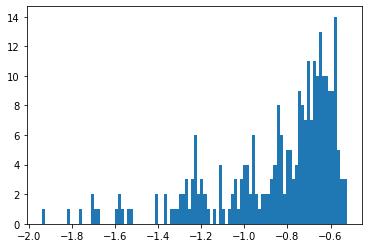

In [97]:
# use previously computed indexes of manually reducted dimensions

manually_reducted_vectors = em.vectors.swapaxes(0, 1)[~total_dimension_filter_idx].swapaxes(0, 1)
print(manually_reducted_vectors.shape)
print_simple_analysis(manually_reducted_vectors)

(629762, 200)
mean: -3.3253276e-08
median: -0.00016672333
max: 56.362186
min: -6.674972
Mean values across entries

Mean mean values across entries: -3.422618632953345e-08
Median mean values across entries: 0.000179952010512352
Max mean values across entries: 0.8642528653144836
Min mean values across entries: -0.04487099498510361


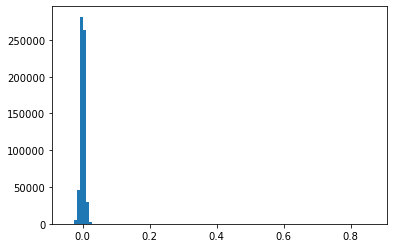



Median values across entries

Mean median values across entries: -0.00020234371186234057
Median median values across entries: -0.0001407308445777744
Max median values across entries: 0.3702550530433655
Min median values across entries: -0.12377042323350906


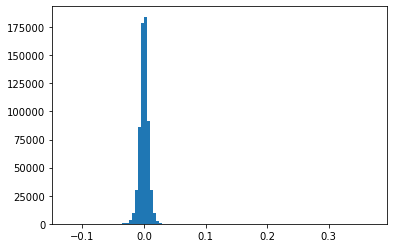



Max values across entries

Mean max values across entries: 0.3932702839374542
Median max values across entries: 0.3715447187423706
Max max values across entries: 56.362186431884766
Min max values across entries: 0.07442506402730942


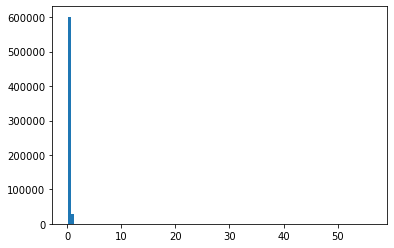



Min values across entries

Mean min values across entries: -0.37328776717185974
Median min values across entries: -0.35264843702316284
Max min values across entries: -0.10002885013818741
Min min values across entries: -6.674972057342529


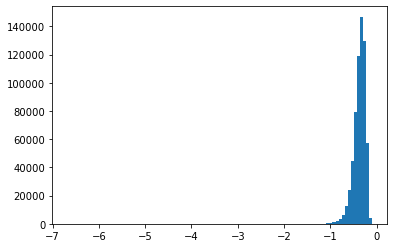



Mean values across dimensions

Mean mean values across dimensions: -3.9536672602480394e-08
Median mean values across dimensions: -1.892689560634153e-09
Max mean values across dimensions: 2.092498107231222e-06
Min mean values across dimensions: -2.1159864900255343e-06


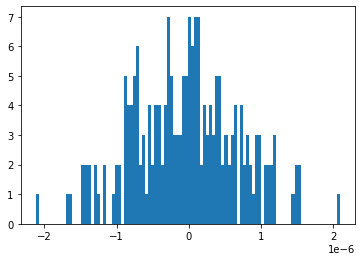



Median values across dimensions

Mean median values across dimensions: -0.00036787218414247036
Median median values across dimensions: -0.00011462961265351623
Max median values across dimensions: 0.038891322910785675
Min median values across dimensions: -0.05616213008761406


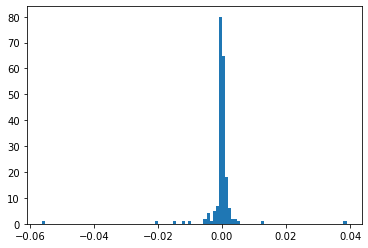



Max values across dimensions

Mean max values across dimensions: 1.9491840600967407
Median max values across dimensions: 1.0311164855957031
Max max values across dimensions: 56.362186431884766
Min max values across dimensions: 0.5182633996009827


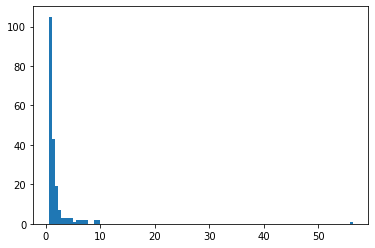



Min values across dimensions

Mean min values across dimensions: -0.9559876322746277
Median min values across dimensions: -0.6765226125717163
Max min values across dimensions: -0.4429609775543213
Min min values across dimensions: -6.674972057342529


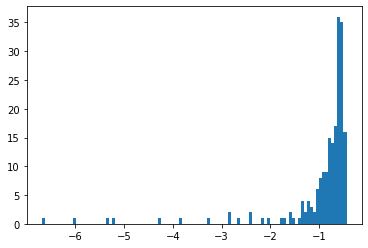

In [74]:
from sklearn.decomposition import PCA

pca = PCA(n_components=200)
transformed_vectors = pca.fit_transform(em.vectors)
print(transformed_vectors.shape)
print_simple_analysis(transformed_vectors)

### Dimensionality reduction conclusion

Manual dimensionality reduction gives better balanced data without vocabulary loss. It remains unclear whether the loss of approximately 12% of dimensions would damage the accuracy of embeddings.

Automatic DR is cleaner, but it does not provided required balancing.